In [1]:
import pandas as pd

# Importing & Exporting Data

<img src="../images/sec08-importing_exporting/00-section_goals.png">

## 1 - Preprocessing Options

### READ_CSV Revisited

<img src="../images/sec08-importing_exporting/01-read_csv_revisited.png">

In [3]:
oil = pd.read_csv("../retail/oil.csv")

oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
columns = ["Date", "Oil Price"] # need to rename all columns simultaneously

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns)

oil.head()

,Date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


### Setting an Index

You can `set the index` for the DataFrame with the `index_col` argument
* Pass a list of column names to create a multi-index DataFrame (_not recommended!_)
* Specify `parse_dates=True` to convert index column to a datetime data type

```python
pd.read_csv("monthly_sales.csv",
            index_col="Date",
            parse_dates=True).index.dtype
```

### Selecting Columns

You can `select the columns` to read in with the `usecols` argument
* This can save a lot of processing time and memory

```python
pd.read_csv("monthly_sales.csv", usecols=["Date", "Sales"]).head(3)
```

In [5]:
columns = ["Date", "Oil Price"] # need to rename all columns simultaneously

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date")

oil.head()

,Oil Price
Date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [6]:
oil.index.dtype # object type

dtype('O')

In [7]:
columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True)

oil.index.dtype # datetime64 type

dtype('<M8[ns]')

In [8]:
oil.head(3)

,Oil Price
Date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97


In [9]:
columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True,
                  usecols=[0, 1]) # usecols=["Date", "Oil Price"]

oil.head(3)

,Oil Price
Date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97


### Selecting Rows

You can `select the rows` to read in from the top with the `nrows` argument, and specify any rows to skip with `skiprows`

<img src="../images/sec08-importing_exporting/02-select_rows.png">

### Missing Values

You can specify strings (or other values) to treat as `missing values` with the `na_values` argument
* They are replaced with NumPy NaN values

<img src="../images/sec08-importing_exporting/03-missing_values.png">

In [10]:
columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True,
                  usecols=["Date", "Oil Price"],
                  skiprows=[0] # skip the first row that has missing value (create a series that never reads in the first row)
                  ) 

oil.head(3)

,Oil Price
Date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12


In [11]:
columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True,
                  usecols=["Date", "Oil Price"],
                  skiprows=[0],
                  nrows=3 # only read in the first 3 rows
                  ) 

oil

,Oil Price
Date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12


In [12]:
columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True,
                  usecols=["Date", "Oil Price"],
                  # skiprows=[0],
                  skiprows = lambda x: x % 2 == 1 # skip all odd numbered rows
                  ) 

oil

,Oil Price
Date,
2013-01-02,93.14
2013-01-04,93.12
2013-01-08,93.21
2013-01-10,93.81
2013-01-14,94.27
...,...
2017-08-21,47.39
2017-08-23,48.45
2017-08-25,47.65


In [13]:
# take a look at fixing missing values

columns = ["Date", "Oil Price"] 

oil = pd.read_csv("../retail/oil.csv",
                  header=0,
                  names=columns,
                  index_col="Date",
                  parse_dates=True,
                  usecols=["Date", "Oil Price"],
                  na_values= 93.14 # replace 93.14 with NaN
                  ) 

oil.head(3)

,Oil Price
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,92.97


### Parsing Dates

Dates are read in as `object` data types by default, but you can `parse dates` with the `parse_dates` argument to convert them to `datetime64`
* Specifying `infer_datetime_format=True` will speed up the date parsing 

<img src="../images/sec08-importing_exporting/04-parsing_dates.png">

### Data Types

You can set the `data type` for each column with the `dtype` argument by passing in a dictionary with column names as keys and desired data types as values
* Get your data into its most efficient format from the start!

<img src="../images/sec08-importing_exporting/05-data_types.png">

### **PRO TIP:** Converters

You can apply functions to columns of data by using the `converters` argument
* Pass a dictionary with the column names as keys and the functions as values

<img src="../images/sec08-importing_exporting/06-converters.png">

## 2 - Flat Files

### 2.1 - Reading TXT Files
The `read_csv()` function can also `read in .txt files`, and other types of flat files
* Simply use the `sep` argument to specify the delimiter
* You can also read in `.tsv`_(tab separated values)_ files and URLs pointing to text files

Example:
```python
pd.read_csv('tab_separated.txt', sep='\t')
```
_"`\t`" represents a tab_

### 2.2 - Reading Excel Files

The `read_excel()` function is used to `read in Excel files` in Pandas
* You can specify worksheets by passing the sheet name or position to the `sheet_name` argument

```python
pd.read_excel('monthly_sales.xlsx', sheet_name=1) # 0-indexed
```


### 2.3 - Appending Sheets

You can use Pandas' `concat()` function to `append data from multiple sheets`

<img src="../images/sec08-importing_exporting/07-appending_sheets.png">


In [20]:
pd.read_excel("../retail/premier_league_games_full.xlsx") 

,id,league_name,season,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,1729,England Premier League,2008/2009,Manchester United,Newcastle United,1,1
1,1730,England Premier League,2008/2009,Arsenal,West Bromwich Albion,1,0
2,1731,England Premier League,2008/2009,Sunderland,Liverpool,0,1
3,1732,England Premier League,2008/2009,West Ham United,Wigan Athletic,2,1
4,1733,England Premier League,2008/2009,Aston Villa,Manchester City,4,2
...,...,...,...,...,...,...,...
3035,4764,England Premier League,2015/2016,Southampton,Leicester City,2,2
3036,4765,England Premier League,2015/2016,Swansea City,Stoke City,0,1
3037,4766,England Premier League,2015/2016,Tottenham Hotspur,Liverpool,0,0
3038,4767,England Premier League,2015/2016,Watford,Arsenal,0,3


### 2.4 - Exporting To Flat Files

The `to_csv()` and `to_excel()` functions let you `export DataFrames` to flat files

<img src="../images/sec08-importing_exporting/08-export_to_flat_files.png">

## 3 - SQL Databases

### Connecting to SQL Databases



The SQLAlchemy library lets you `connect to SQL databases` 
* All major SQL implementations can be accessed (_MySQL, Oracle, MS-SQL, etc._)

_Here we're importing two functions from SQL Alchemy:_
* _`create_engine` - which establishes our database connection, and_
* _`inspect` - which allows us to retrieve metadata on our database_

<img src="../images/sec08-importing_exporting/09-connecting_to_sql.png">

### Querying SQL Databases

The `read_sql()` function lets you create a DataFrame from a `SQL query` 

<img src="../images/sec08-importing_exporting/10-querying_sql.png">

### Writing To SQL Databases

The `to_sql()` function lets you `create a SQL table` from your DataFrame
* This lets you clean data using Pandas before storing it in a SQL Database
* You will likely need permission from your database administrator (DBA) to do this

<img src="../images/sec08-importing_exporting/11-writing_to_sql.png">

## 4 - Additional Formats

<img src="../images/sec08-importing_exporting/12-additional_formats.png">

In [1]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP'

gdb_data = pd.read_html(url)[0] # multiple tables on the site, just grab the first one

In [2]:
gdb_data.head()

State or federal district  \
  State or federal district   
0                       NaN   
1              California *   
2                   Texas *   
3                New York *   
4                 Florida *   

  Nominal GDP at current prices 2022 (millions of U.S. dollars)[1]             \
                                                              2022       2021   
0                                                NaN                      NaN   
1                                          3598103.0                3373241.0   
2                                          2355960.0                2051769.0   
3                                          2053180.0                1901297.0   
4                                          1389070.0                1255558.0   

  Annual GDP change at current prices 2022 (21–22)[1]  \
  Annual GDP change at current prices 2022 (21–22)[1]   
0                                                NaN    
1                                           224862.0    
2                                           304191.0    
3                                           151883.0    
4                                           133482.0    

                                                         \
  Annual GDP change at current prices 2022 (21–22)[1].1   
0                                                NaN      
1                                              11.6%      
2                                              32.6%      
3                                               7.5%      
4                                              10.9%      

  Real GDP growth rate (2021–2022)[1] Nominal GDP per capita 2022[1][3]  \
  Real GDP growth rate (2021–2022)[1]                              2022   
0                                 NaN                               NaN   
1                                7.8%                           $92,190   
2                                5.6%                           $78,456   
3                                5.0%                          $104,344   
4                                6.9%                           $62,446   

           % of national[1]          
      2021             2022    2021  
0      NaN              NaN     NaN  
1  $85,316           14.69%  14.49%  
2  $70,398            8.69%   8.55%  
3  $94,118            8.11%   8.31%  
4  $58,295            5.37%   5.34%

In [3]:
# cleanup - drop the index level and the first row 

gdb_data = (gdb_data
            .droplevel(0, axis=1) # drop the first level of the index
            .drop(index=0) # drop the first row
            )

In [4]:
gdb_data.head()

,State or federal district,2022,2021,Annual GDP change at current prices 2022 (21–22)[1],Annual GDP change at current prices 2022 (21–22)[1].1,Real GDP growth rate (2021–2022)[1],2022,2021,2022,2021
1,California *,3598103.0,3373241.0,224862.0,11.6%,7.8%,"$92,190","$85,316",14.69%,14.49%
2,Texas *,2355960.0,2051769.0,304191.0,32.6%,5.6%,"$78,456","$70,398",8.69%,8.55%
3,New York *,2053180.0,1901297.0,151883.0,7.5%,5.0%,"$104,344","$94,118",8.11%,8.31%
4,Florida *,1389070.0,1255558.0,133482.0,10.9%,6.9%,"$62,446","$58,295",5.37%,5.34%
5,Illinois *,1033310.0,945674.0,87636.0,9.3%,5.0%,"$82,126","$73,811",4.11%,4.13%


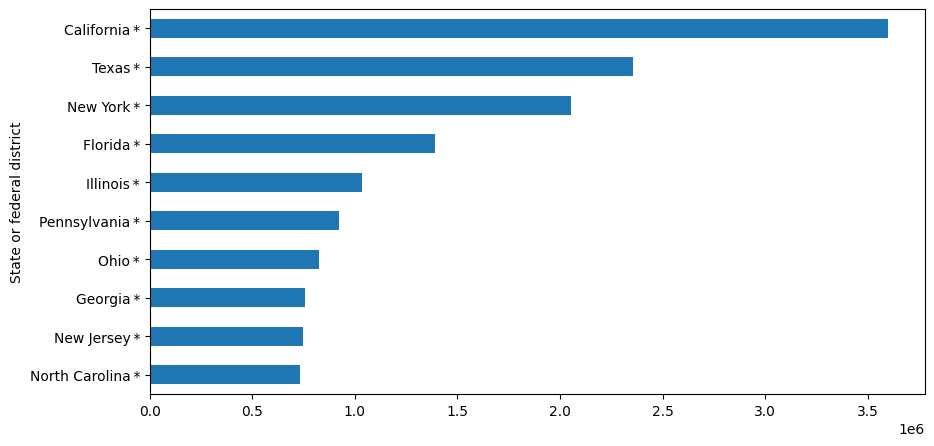

In [10]:
(gdb_data
 .set_index("State or federal district")
 .iloc[:10, 0]
 .sort_values()
 .plot.barh(figsize=(10, 5))
 );

## KEW TAKEAWAYS

<img src="../images/sec08-importing_exporting/13-key_takeaways.png">